<a href="https://colab.research.google.com/github/hartaranus/water-particle-simulation/blob/main/SimulateBasesWaterOxygen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pykeops[colab]
!pip install sisyphe

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 213 kB 22.9 MB/s 
     |████████████████████████████████| 82 kB 173 kB/s 
  Created wheel for pykeops: filename=pykeops-2.0-py3-none-any.whl size=111857 sha256=72655039820a2aeefa7eb71e568a57427590dd6615ce87c6e4111c03dca6a327
  Stored in directory: /root/.cache/pip/wheels/04/db/0a/41fea7b4f2988dca3db45a5a1f9d7e58f0c853d1cf11e6c86f
  Created wheel for keopscore: filename=keopscore-2.0-py3-none-any.whl size=145220 sha256=f016c8667694daa7510a1a6b0f40a3f5841602a85b02984989644f089804a6d9
  Stored in directory: /root/.cache/pip/wheels/05/09/d0/73569f8628961b07f62c93949e278787b0fc37aebc7b356e98
Successfully built pykeops keopscore
     |████████████████████████████████| 40 kB 2.7 MB/s 
  Created wheel for sisyphe: filename=sisyphe-1.1-py3-none-any.whl size=41405 sha256=f44301fb1042a266dd9aac11c028e5eb2584f2f95acb4f97c98154a15978ed8e
  Stored in directory: /root/.cache/pip/wheels/a1/e6/74/314c4eb06e3

In [2]:
import os
import sys
import time
import math
import torch
import numpy as np
from matplotlib import pyplot as plt
import sisyphe.models as models
from sisyphe.display import display_kinetic_particles

use_cuda = torch.cuda.is_available()
dtype = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor

[KeOps] Compiling cuda jit compiler engine ... OK
[pyKeOps] Compiling nvrtc binder for python ... OK


In [3]:
N = 10000 #water molecules in the system
mass = 18015.28 + 31999.9 #water + oxygen molecular mass [mg/mol]
L = 10. #box size

Ca = .1 #amplitude attractive
la = 2.75 - ((8.08/100)*2.75) - 1.208 #range attractive [total length of water molecule - O2 length]
Cr = 1. #amplitude repulsive
lr = 1.84 - (8.08/100)*2.75 #range repulsive [negative net dipole moment + O2 dipole moment]

alpha = 1.6
beta = .5
v0 = math.sqrt(alpha/beta)

pos = L*torch.rand((N,2)).type(dtype)
vel = torch.randn(N,2).type(dtype)
vel = vel/torch.norm(vel,dim=1).reshape((N,1))
vel = v0*vel

dt = .01

simu = models.AttractionRepulsion(pos=pos,
                 vel=vel,
                 interaction_radius=math.sqrt(mass),
                 box_size=L,
                 propulsion = alpha,
                 friction = beta,
                 Ca = Ca,
                 la = la,
                 Cr = Cr,
                 lr = lr,
                 dt=dt,
                 p=1,
                 isaverage=True)

[KeOps] Generating code for formula Sum_Reduction((-Var(0,1,0)*Var(1,1,1))*(((Var(6,1,2)*Exp(-Sqrt(Sum((Var(2,2,0)-Var(3,2,1))**2)+(-Sign(Sum((Var(2,2,0)-Var(3,2,1))**2))+Var(4,1,2)))/Var(5,1,2))-Var(8,1,2)*Exp(-Sqrt(Sum((Var(2,2,0)-Var(3,2,1))**2)+(-Sign(Sum((Var(2,2,0)-Var(3,2,1))**2))+Var(4,1,2)))/Var(7,1,2)))*Rsqrt(Sum((Var(2,2,0)-Var(3,2,1))**2)+(-Sign(Sum((Var(2,2,0)-Var(3,2,1))**2))+Var(4,1,2))))*(Var(2,2,0)-Var(3,2,1))),0) ... OK
Progress:0%

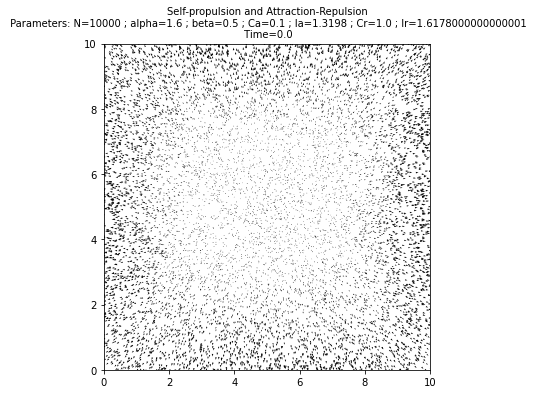

Progress:1%

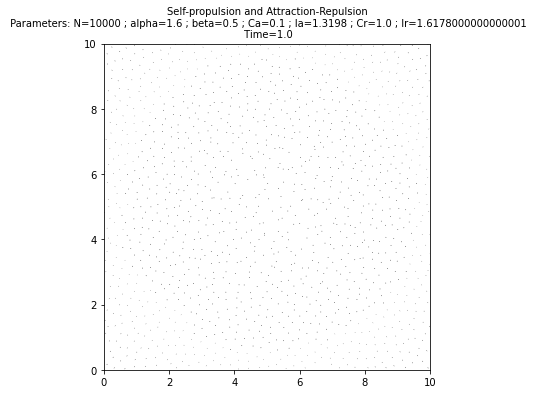

Progress:2%

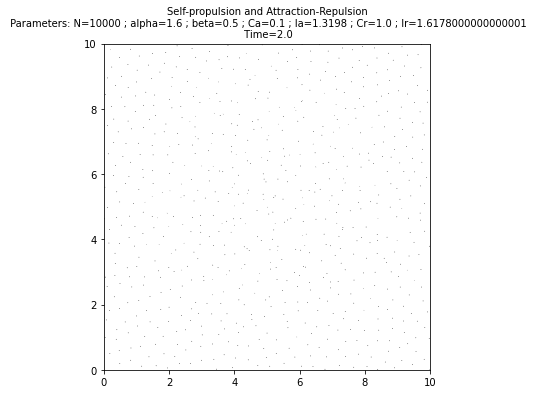

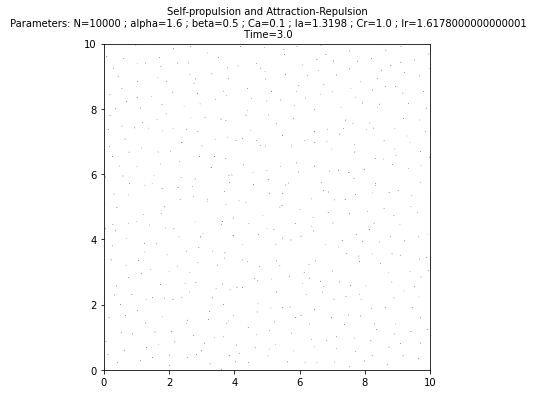

Progress:3%

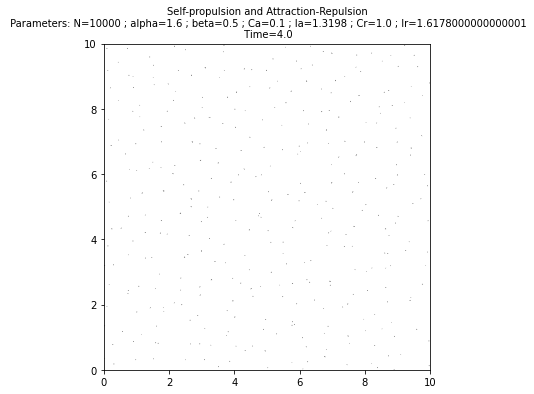

Progress:4%

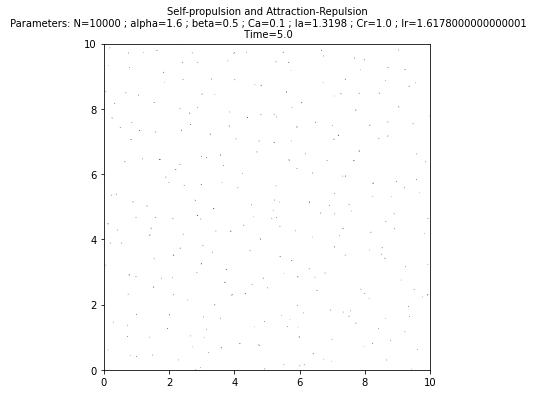

Progress:9%

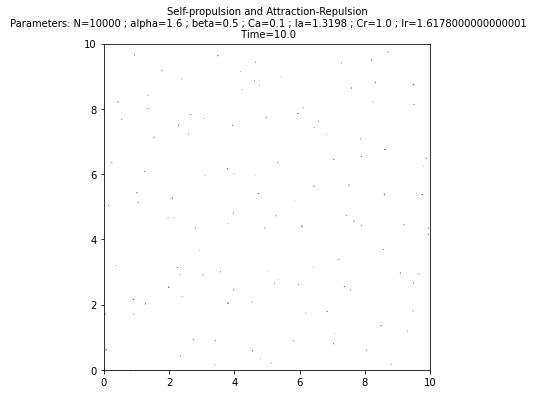

Progress:39%

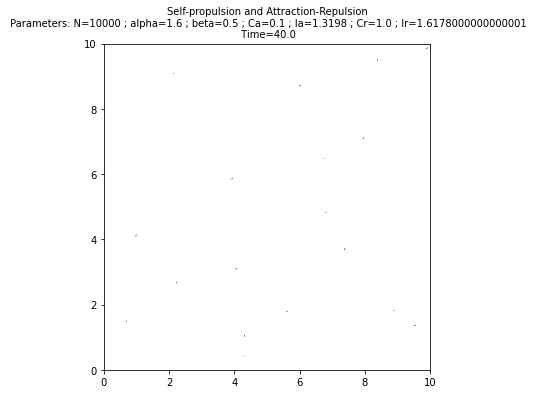

Progress:70%

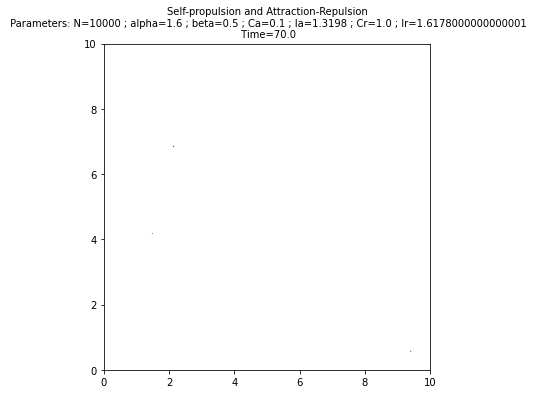

Progress:99%

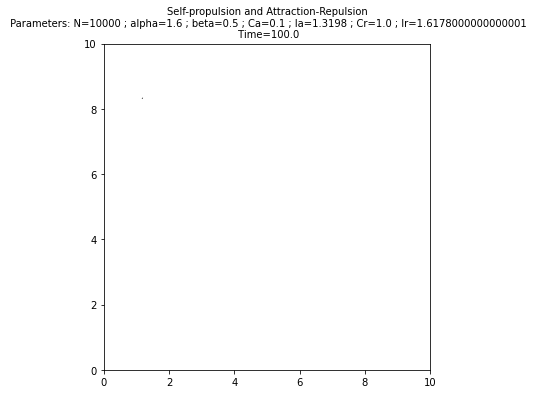

In [4]:
frames = [0,1,2,3,4,5,10,40,70,100]

s = time.time()
it, op = display_kinetic_particles(simu,frames)
e = time.time()